- Using meteostat drawing weather data of all cities and save the data to csv file

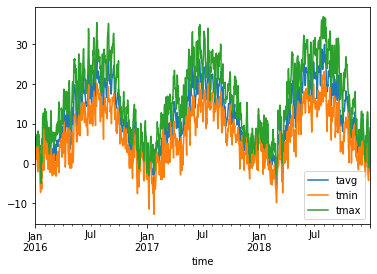

In [1]:
from meteostat import Stations, Daily
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd

# Set time period
start = datetime(2016, 1, 1)
end = datetime(2018, 12, 31)

# Get daily data
data = Daily('10637', start, end)
data = data.fetch()

# Plot line chart including average, minimum and maximum temperature
data.plot(y=['tavg', 'tmin', 'tmax'])
plt.show()

In [2]:
stations = Stations()
stations.region('USA','GA')

In [3]:
df_loc = pd.read_csv('datasets\\us-cities-top-1k.csv')
df_cab = pd.read_csv('datasets\Cab_Data.csv')
df_loc

,City,State,Population,lat,lon
0,Marysville,Washington,63269,48.051764,-122.177082
1,Perris,California,72326,33.782519,-117.228648
2,Cleveland,Ohio,390113,41.499320,-81.694361
3,Worcester,Massachusetts,182544,42.262593,-71.802293
4,Columbia,South Carolina,133358,34.000710,-81.034814
...,...,...,...,...,...
995,West New York,New Jersey,52122,40.787879,-74.014306
996,Everett,Massachusetts,42935,42.408430,-71.053663
997,Linden,New Jersey,41301,40.622048,-74.244590
998,Asheville,North Carolina,87236,35.595058,-82.551487


In [4]:
cities = list(df_cab.City.unique())
cities1 = [i.strip() for i in cities]

In [5]:
cities_2 = [i[:-2]for i in cities1]
cities_corrected = [i.strip().capitalize() for i in cities_2]
cities_corrected

['Atlanta',
 'Austin',
 'Boston',
 'Chicago',
 'Dallas',
 'Denver',
 'Los angeles',
 'Miami',
 'Nashville',
 'New york',
 'Orange coun',
 'Phoenix',
 'Pittsburgh',
 'Sacramento',
 'San diego',
 'Seattle',
 'Silicon vall',
 'Tucson',
 'Washington']

In [6]:
df_loc[df_loc['City'] == 'New York']
unique_loc = df_loc.City.unique()
unique_loc[:5]

array(['Marysville', 'Perris', 'Cleveland', 'Worcester', 'Columbia'],
      dtype=object)

In [7]:
from fuzzywuzzy import fuzz

In [8]:
j_c = []
for i in cities_corrected:
    for j in unique_loc:
        if fuzz.ratio(i,j) > 80:
            j_c.append(j)
        else:
            pass


In [9]:
lats = []
lons = []
citiesloc = []
for i in j_c:
    lats.append(float((df_loc[df_loc['City'] == i]['lat']).values))
    lons.append(float((df_loc[df_loc['City'] == i]['lon']).values))
    citiesloc.append(i)

In [10]:
dict_loc = {'City': citiesloc,
            'lon': lons,
            'lat':lats}
df_loc = pd.DataFrame(dict_loc)
df_loc['lon']= round(df_loc['lon'],4)
df_loc['lat']= round(df_loc['lat'],4)

df_loc[['lat','lon']].iloc[2,:]

lat    30.2672
lon   -97.7431
Name: 2, dtype: float64

In [11]:
df_loc

,City,lon,lat
0,Atlanta,-84.3880,33.7490
1,Tustin,-117.8262,33.7459
2,Austin,-97.7431,30.2672
3,Boston,-71.0589,42.3601
4,Chico,-121.8375,39.7285
5,Chicago,-87.6298,41.8781
6,Dallas,-96.7970,32.7767
7,Denver,-104.9903,39.7392
8,Los Angeles,-118.2437,34.0522
9,Miami,-80.1918,25.7617


In [12]:
stationslist = []
for i in range(len(lats)):
    stations = Stations()
    stations = stations.nearby(lats[i],lons[i])
    station = stations.fetch(1)
    stationslist.append(station)
    

In [14]:
from meteostat import Point
pointlist = []
datas = []
for i in range(len(lats)):
    points = Point(lats[i],lons[i], 70)
    pointlist.append(points)



In [15]:
pointlist

In [17]:
atlanta = Daily(pointlist[0], start, end)
atlanta = atlanta.fetch()
atlanta['City'] = 'ATLANTA GA'
austin = Daily(pointlist[1], start, end)
austin = austin.fetch()
austin['City'] = 'AUSTIN TX'
boston = Daily(pointlist[2], start, end)
boston = boston.fetch()
boston['City'] = 'BOSTON MA'
chicago = Daily(pointlist[3], start, end)
chicago = chicago.fetch()
chicago['City'] = 'CHICAGO IL'
dallas = Daily(pointlist[4], start, end)
dallas = dallas.fetch()
dallas['City'] = 'DALLAS TX'
denver = Daily(pointlist[5], start, end)
denver = denver.fetch()
denver['City'] = 'DENVER CO'
losangeles = Daily(pointlist[6], start, end)
losangeles = losangeles.fetch()
losangeles['City'] = 'LOS ANGELES CA'



In [18]:
miami = Daily(pointlist[7], start, end)
miami = miami.fetch()
miami['City'] = 'MIAMI FL'
nashville = Daily(pointlist[8], start, end)
nashville = nashville.fetch()
nashville['City'] = 'NAHVILLE TN'
newyork = Daily(pointlist[9], start, end)
newyork = newyork.fetch()
newyork['City'] = 'NEW YORK NY'
orange = Daily(pointlist[10], start, end)
orange = orange.fetch()
orange['City'] = 'ORANGE COUNTY'
phoenix = Daily(pointlist[11], start, end)
phoenix = phoenix.fetch()
phoenix['City'] = 'PHOENIX AZ'
pittsburgh = Daily(pointlist[12], start, end)
pittsburgh = pittsburgh.fetch()
pittsburgh['City'] = 'PITTSBURGH PA'

In [19]:
sacramento = Daily(pointlist[13], start, end)
sacramento = sacramento.fetch()
sacramento['City'] = 'SACRAMENTO CA'
seattle = Daily(pointlist[15], start, end)
seattle = seattle.fetch()
seattle['City'] = 'SEATTLE WA'



In [20]:
sandiego = Daily(pointlist[14], start, end)
sandiego = sandiego.fetch()
sandiego['City'] = 'SAN DIEGO CA'



In [21]:
silicon = Daily(pointlist[16], start, end)
silicon = silicon.fetch()
silicon['City'] = 'SILICON VALLEY'


In [22]:
tucson = Daily(pointlist[17], start, end)
tucson = tucson.fetch()
tucson['City'] = 'TUCSON AZ'
washington = Daily(pointlist[18], start, end)
washington = washington.fetch()
washington['City'] = 'WASHINGTON DC'

In [23]:
all_data = pd.concat([atlanta,austin,boston,chicago,dallas,denver,losangeles,miami,nashville,newyork,orange,phoenix,pittsburgh,sacramento,sandiego,seattle,silicon,tucson,washington])

In [26]:
all_data.to_csv('weather_data.csv', index=True)